In [1]:
import pandas as pd
import numpy as np

**Bora praticar!**
  
Os bancos obtêm uma receita importante com empréstimos concedidos. Mas muitas vezes está associado ao risco. O mutuário pode não pagar o empréstimo. Para mitigar esse problema, os bancos decidiram usar o Machine Learning para superar esse problema. Eles coletaram dados anteriores sobre os tomadores de empréstimos e gostariam que você desenvolvesse um modelo de ML forte para classificar se algum novo devedor provavelmente entrará em default ou não.  
  
O conjunto de dados é enorme e consiste em vários fatores determinísticos, como renda do mutuário, gênero, finalidade do empréstimo, etc. O conjunto de dados está sujeito a uma forte multicolinearidade e valores vazios. Você pode superar esses fatores e construir um classificador forte para prever inadimplentes?  
  
Importe a base **Loan_Default.csv** que está em csv dentro do diretório **dados**.

In [2]:
df_loan = pd.read_csv('./dados/Loan_Default.csv')
df_loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,construction_type,occupancy_type,income,credit_type,Credit_Score,age,submission_of_application,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,sb,pr,1740.0,EXP,758,25-34,to_inst,98.728814,south,1
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,sb,pr,4980.0,EQUI,552,55-64,to_inst,NaN,North,1
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,9480.0,EXP,834,35-44,to_inst,80.019685,south,0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,sb,pr,11880.0,EXP,587,45-54,not_inst,69.376900,North,0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,sb,pr,10440.0,CRIF,602,25-34,not_inst,91.886544,North,0


In [3]:
df_loan.shape

(148670, 25)

In [4]:
df_loan.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'income', 'credit_type',
       'Credit_Score', 'age', 'submission_of_application', 'LTV', 'Region',
       'Status'],
      dtype='object')

In [5]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_only              148670 non-null  object 
 13  lump_sum_payment           14

In [6]:
df_loan.describe()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [10]:
len([0, 1, 1, 3, 4, 5, 6, 8, 8, 9, 9, 9])
25% - 1
50% - 5.5
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

12

In [14]:
df_loan['Status'].quantile(q=0.75)

0.0

In [16]:
df_loan.isna().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
income                        9150
credit_type                      0
Credit_Score                     0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status                           0
dtype: int64

In [15]:
df_loan.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
income                        9150
credit_type                      0
Credit_Score                     0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Status                           0
dtype: int64

In [18]:
(df_loan.isnull().sum() / len(df_loan))*100

ID                            0.000000
year                          0.000000
loan_limit                    2.249277
Gender                        0.000000
approv_in_adv                 0.610749
loan_type                     0.000000
loan_purpose                  0.090133
Credit_Worthiness             0.000000
open_credit                   0.000000
business_or_commercial        0.000000
loan_amount                   0.000000
rate_of_interest             24.509989
interest_only                 0.000000
lump_sum_payment              0.000000
property_value               10.155378
construction_type             0.000000
occupancy_type                0.000000
income                        6.154571
credit_type                   0.000000
Credit_Score                  0.000000
age                           0.134526
submission_of_application     0.134526
LTV                          10.155378
Region                        0.000000
Status                        0.000000
dtype: float64

Vamos analisar nossa variável de interesse **Status**

In [19]:
df_loan['Status'].value_counts()

0    112031
1     36639
Name: Status, dtype: int64

In [20]:
df_loan['Status'].value_counts(normalize=True)

0    0.753555
1    0.246445
Name: Status, dtype: float64

In [21]:
df_loan['Status'].mean()

0.24644514696979888

In [23]:
df_loan['age'].value_counts()

45-54    34720
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [24]:
df_loan['age'].unique()

array(['25-34', '55-64', '35-44', '45-54', '65-74', '>74', '<25', nan],
      dtype=object)

In [25]:
df_loan['credit_type'].value_counts()

CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: credit_type, dtype: int64

Agora podemos verificar as relações das variáveis presentes no dataset com a nossa variável de interesse.

In [26]:
df_loan.pivot_table(index='credit_type', values='Status', aggfunc='mean')

,Status
credit_type,
CIB,0.158041
CRIF,0.162343
EQUI,0.999935
EXP,0.159854


In [27]:
df_loan[['income']]

,income
0,1740.0
1,4980.0
2,9480.0
3,11880.0
4,10440.0
...,...
148665,7860.0
148666,7140.0
148667,6900.0
148668,7140.0


In [31]:
def salarios(salario):
    if np.isnan(salario):
        return np.nan
    elif salario <= 1000:
        return "0-1000"
    elif salario <= 2000:
        return "1000-2000"
    elif salario <= 5000:
        return "2000-5000"
    else:
        return ">5000"

In [35]:
df_loan['faixa_salario'] = df_loan['income'].apply(salarios)
df_loan.pivot_table(index='faixa_salario', values='Status', aggfunc='mean')

,Status
faixa_salario,
0-1000,0.909242
1000-2000,0.415637
2000-5000,0.282545
>5000,0.209614


In [37]:
df_loan.pivot_table(index='Region', values='Status', aggfunc='mean')

,Status
Region,
North,0.225114
North-East,0.304453
central,0.275382
south,0.266293


In [38]:
df_loan.pivot_table(index='age', values='Status', aggfunc='mean')

,Status
age,
25-34,0.221920
35-44,0.222713
45-54,0.240467
55-64,0.258868
65-74,0.268560
<25,0.289454
>74,0.300070


In [39]:
df_loan.corr()

,ID,year,loan_amount,rate_of_interest,property_value,income,Credit_Score,LTV,Status
ID,1.000000,NaN,-0.000566,0.000442,0.000990,0.002535,-0.001036,-0.005853,0.001703
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,-0.000566,NaN,1.000000,-0.150844,0.734249,0.456065,0.004438,0.038869,-0.036825
rate_of_interest,0.000442,NaN,-0.150844,1.000000,-0.122613,-0.041809,-0.001331,-0.000220,0.022957
property_value,0.000990,NaN,0.734249,-0.122613,1.000000,0.414883,0.002430,-0.215102,-0.048864
income,0.002535,NaN,0.456065,-0.041809,0.414883,1.000000,0.000802,-0.066203,-0.065119
Credit_Score,-0.001036,NaN,0.004438,-0.001331,0.002430,0.000802,1.000000,-0.005533,0.004004
LTV,-0.005853,NaN,0.038869,-0.000220,-0.215102,-0.066203,-0.005533,1.000000,0.038895
Status,0.001703,NaN,-0.036825,0.022957,-0.048864,-0.065119,0.004004,0.038895,1.000000


In [44]:
df_loan[['Credit_Score']].describe()

,Credit_Score
count,148670.000000
mean,699.789103
std,115.875857
min,500.000000
25%,599.000000
50%,699.000000
75%,800.000000
max,900.000000


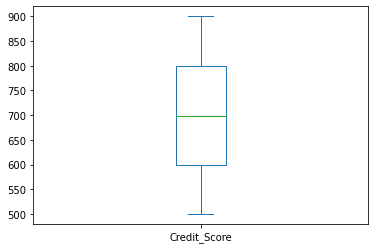

In [43]:
df_loan[['Credit_Score']].plot(kind='box');

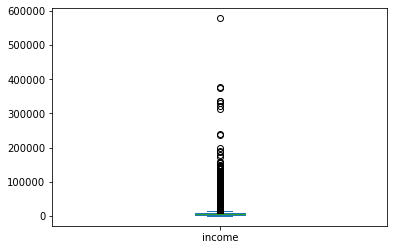

In [42]:
df_loan[['income']].plot(kind='box');

## Projeto
  
O projeto desde módulo será uma aplicação prática do conteúdo de Técnicas de Programação I no python.  
  
**Objetivo**  
Realizar um EDA (Exploratory Data Analysis) com os conhecimentos obtidos até o momento (Pandas e Numpy). 
  
**Base de Dados**  
Cada grupo será responsável por buscar uma base de dados de seu interesse  
  
**Composição dos grupos**  
A composição dos grupos está descrita no arquivo excel presente no google drive [Grupos-projeto](https://docs.google.com/spreadsheets/d/1B_4dr3SadjxY9jZ9DEzRHDLVu4WDPRBD/edit#gid=1815032600) 
  
**Github**  
Na mesma planilha de composição dos grupos insiram o link para o github de pelo menos um dos integrantes no qual o projeto será armazenado.  
  
**Apresentação**  
A apresentação poderá ser construída no formato de preferência (jupyter notebook, power point..)  
  
**Tempo de apresentação**  
Cada grupo terá no máximo 15 minutos para apresentar o EDA  
  
**Avaliação**  
Para a avaliação serão considerados os seguintes pontos
1. Entendimento do contexto em que se encaixa a base de dados
2. Uso dos conhecimentos obtidos no decorrer do módulo
3. Apresentação das características do conjunto de dados fornecido, destacando sua visão geral acerca do conjunto de dados e tecendo críticas e comentários 
4. Identificação e discussão de missings ou outliers na base de dados
5. Outras análises que sejam pertinentes 
  
**Data de apresentação**  
16/11/2022  
  
**Obs. 1**: Não esqueçam de considerar se as informações são públicas  
**Obs. 2**: Não esqueçam de se divertirem fazendo isso! :D  
  
**BOM TRABALHO!**